In [ ]:
!pip install --upgrade pandas_datareader

In [ ]:
!pip install yfinance

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

In [28]:
def get_data(stocks, start, end):
    stock_data = yf.download(stocks, start=start, end=end)['Adj Close']
    returns = stock_data.pct_change()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    return mean_returns, cov_matrix

stock_list = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
stocks = [stock + '.AX' for stock in stock_list]
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=300)

mean_returns, cov_matrix = get_data(stocks, start_date, end_date)

weights = np.random.random(len(mean_returns))
weights /= np.sum(weights)

print(weights)


[*********************100%***********************]  6 of 6 completed

[0.29404573 0.18954282 0.30100844 0.03860941 0.03434114 0.14245248]


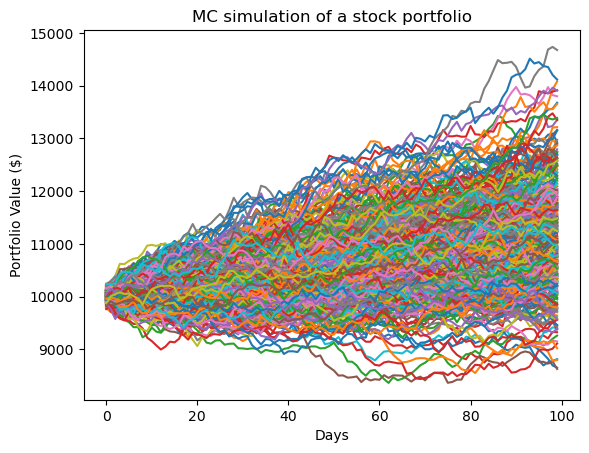

In [42]:
#Monte Carlo Method
mc_sims = 400 # number of simulations
T = 100 # timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=mean_returns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T,mc_sims), fill_value=0.0)
initialPortfolio = 10000

for m in range(0, mc_sims):
    #MC Loops
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(cov_matrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [54]:
def mcVaR(returns, alpha=5):
  
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError("Expected a pandas data series.")

def mcCVaR(returns, alpha=5):
 
    if isinstance(returns, pd.Series):
        belowVaR = returns <= mcVaR(returns, alpha=alpha)
        return returns[belowVaR].mean()
    else:
        raise TypeError("Expected a pandas data series.")

In [58]:
portResults = pd.Series(portfolio_sims[-1,:])

VaR = initialPortfolio - mcVaR(portResults, alpha=5)
CVaR = initialPortfolio - mcCVaR(portResults, alpha=5)

print('VaR ${}'.format(round(VaR,2)))
print('CVaR ${}'.format(round(CVaR,2)))
     

VaR $360.27
CVaR $740.44
